In [3]:
#import required libraries.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Project Goals.

Project goals will summarize the specific goals of this project. From the dataset, we hope to answer specific questions regarding the conservation stauts of different animals. we would like to know what category of animals are more likely to be endangered and if there is such a relation. The data set contains dataset of species and their conservation status. Another one contains the sightings of the animal from 4 different national parks. 

Questions that we hope to answer from the data set are:
1. how many times were a certain specied observed.
2. where was it observed.
3. is there a relation between the species and the category it falls into.

## Loading and explaning the observation dataset

In [4]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [5]:
observations.head(10)


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [6]:
print("total number of observations: ", observations.shape[0])
print("total number of national parks: ", observations.park_name.unique())

total number of observations:  23296
total number of national parks:  ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [7]:
#total number of observations from each park. 
total_obs = observations.groupby('park_name').sum()
print(total_obs)

                                     observations
park_name                                        
Bryce National Park                        576025
Great Smoky Mountains National Park        431820
Yellowstone National Park                 1443562
Yosemite National Park                     863332


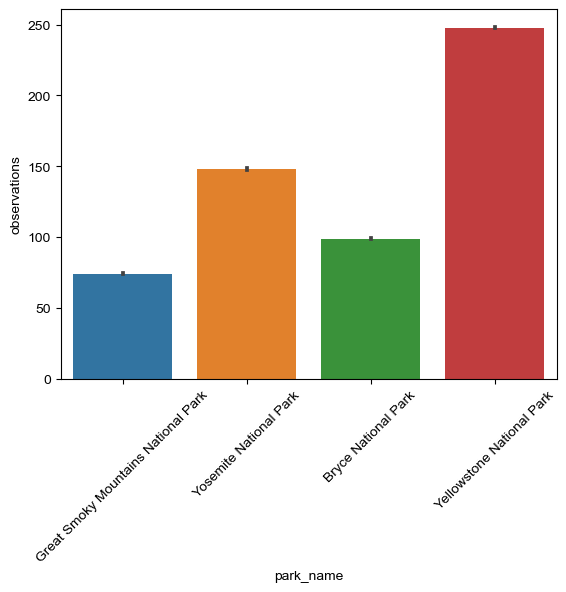

In [9]:
#visualizing the observations from the dataset
sns.barplot(
    data = observations,
    x = observations['park_name'],
    y = observations['observations'],
    
)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.set(font_scale = 2.0)
plt.show()

## Loading and understanding the species dataset.

In [11]:
species = pd.read_csv("species_info.csv")

In [12]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [13]:
print("the total animal species in the data set are: ", species.shape[0])

the total animal species in the data set are:  5824


In [14]:
print("there are 4 conservation status of animals namely: ", species.conservation_status.unique())

there are 4 conservation status of animals namely:  [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [15]:
##the category by which the species are listed in the data set.
category = species.groupby("category").size()
print(category)
category_list = category.tolist()
categories = ['Amphibian','Bird','Fish','Mammal','Nonvascular Plant','Reptile','Vascular Plant']
print(type(category_list))
print(type(categories))

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64
<class 'list'>
<class 'list'>


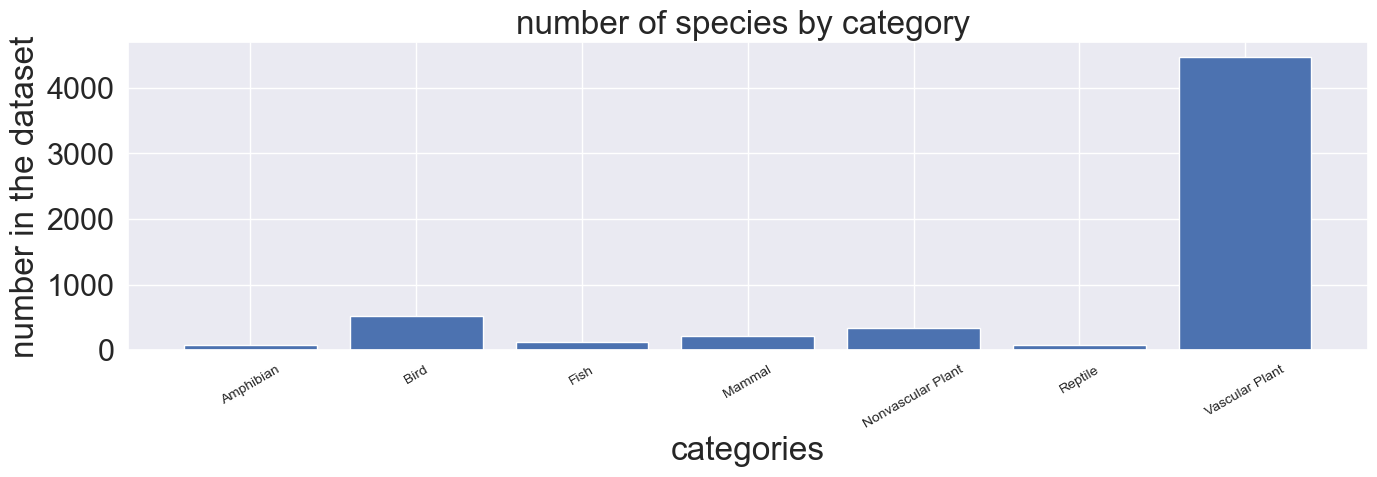

In [33]:
fig = plt.figure(figsize=(16,4))
plt.bar(categories, category_list)
plt.xticks(rotation = 30, fontsize = 10)
plt.xlabel("categories")
plt.ylabel("number in the dataset")
plt.title("number of species by category ")
plt.show()

In [25]:
conservation_status = species.groupby("conservation_status").size()
print(conservation_status)

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


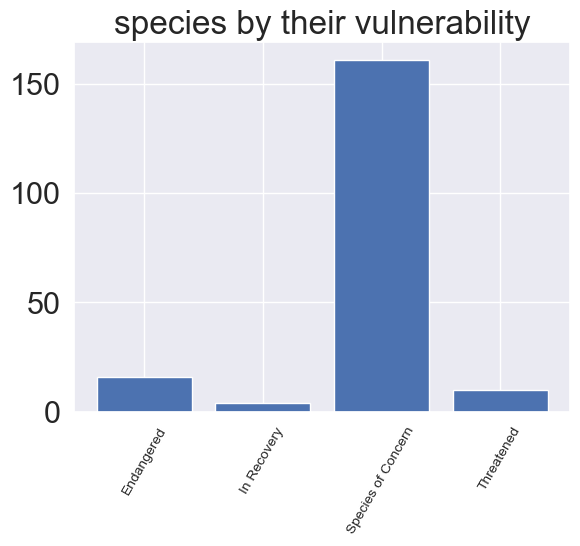

In [34]:
conservation_status_numbers = conservation_status.tolist() 
conservation_categories = ["Endangered","In Recovery","Species of Concern","Threatened"]
plt.bar(conservation_categories, conservation_status_numbers)
plt.xticks(rotation = 60, fontsize = 10)
plt.title("species by their vulnerability")
plt.show()

## Data cleaning and Analysis.
1. we want to clean the data and remove all the unnecessary values or typos from it.
2. we want to combine both of the datasets into one dataframe.
3. next, we want to see how many time were ceratain species observed. if the number of observations can help us understand their current status of each species. 

In [36]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [42]:
species.fillna('No Information', inplace=True)
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Information
1,Mammal,Bos bison,"American Bison, Bison",No Information
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Information
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Information
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Information
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Information
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Information
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [44]:
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Information        5633
Species of Concern     161
Threatened              10
dtype: int64

Maybe it is safe to remove the values that do not contain information about conservation status for one data set. we want to see which animals fall in our endangered category.

In [54]:
updated_species_df = species[species['conservation_status'] != 'No Information']
updated_species_df.head(10)

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern


In [55]:
updated_species_df.shape[0]

191

In [48]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [60]:
observations.shape[0]

23296

In [50]:
combined = pd.merge( updated_species_df, observations, how = "left", on ="scientific_name")

In [67]:
combined.head(50)


,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Canis latrans,Coyote,Species of Concern,Bryce National Park,85
1,Mammal,Canis latrans,Coyote,Species of Concern,Yellowstone National Park,206
2,Mammal,Canis latrans,Coyote,Species of Concern,Great Smoky Mountains National Park,68
3,Mammal,Canis latrans,Coyote,Species of Concern,Yosemite National Park,99
4,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35
5,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,27
6,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,29
7,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,74
8,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,15
9,Mammal,Canis lupus,Gray Wolf,Endangered,Yellowstone National Park,60


In [57]:
print(combined.shape[0])

880


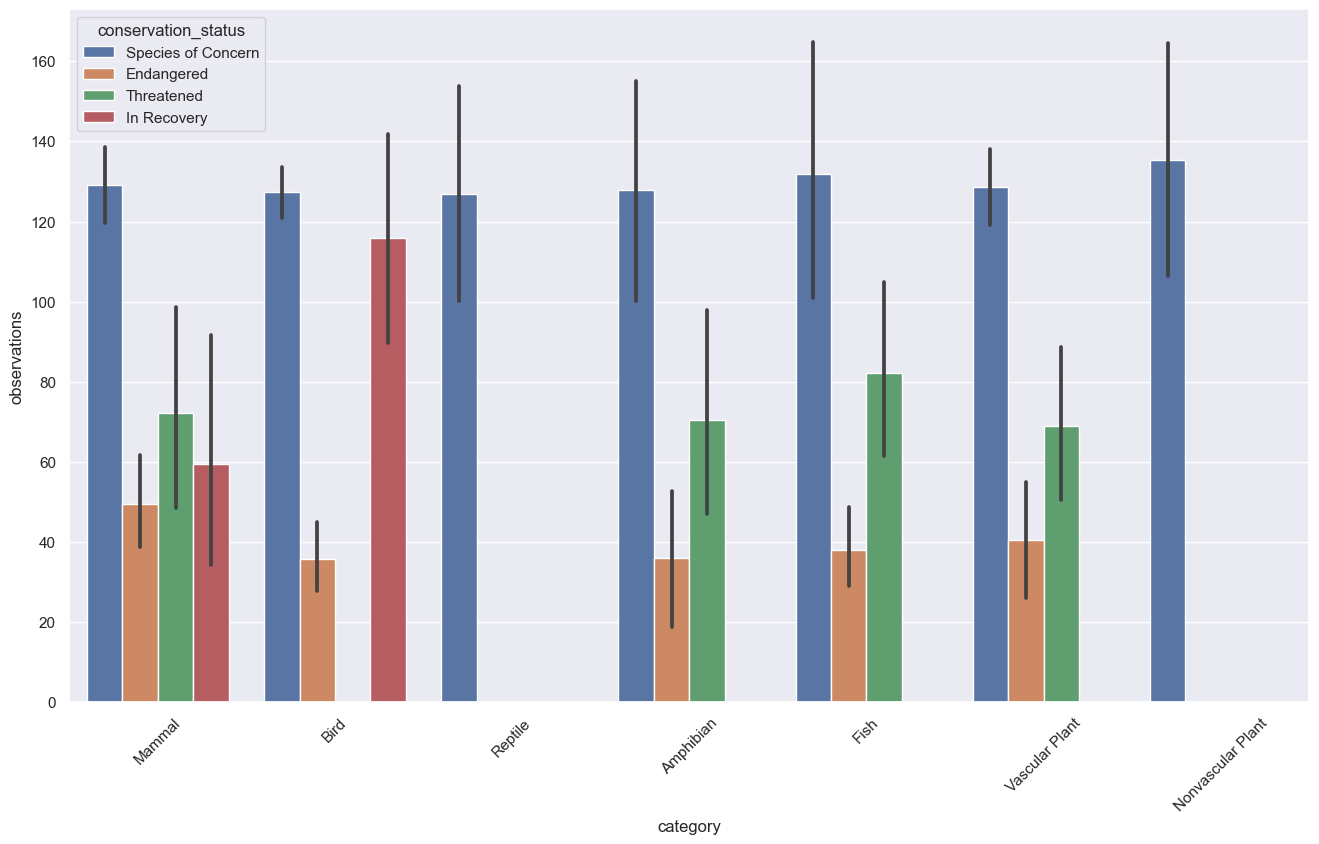

In [71]:
fig = plt.figure(figsize = (16,9))
sns.barplot(
    data = combined,
    x = combined['category'],
    y = combined['observations'],
    hue = combined['conservation_status']
)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.set(font_scale = 0.5)
plt.show()

In [72]:
drop_df = combined.drop( 'scientific_name', axis = 1)

In [73]:
drop_df.head(30)

,category,common_names,conservation_status,park_name,observations
0,Mammal,Coyote,Species of Concern,Bryce National Park,85
1,Mammal,Coyote,Species of Concern,Yellowstone National Park,206
2,Mammal,Coyote,Species of Concern,Great Smoky Mountains National Park,68
3,Mammal,Coyote,Species of Concern,Yosemite National Park,99
4,Mammal,Gray Wolf,Endangered,Yosemite National Park,35
5,Mammal,Gray Wolf,Endangered,Bryce National Park,27
6,Mammal,Gray Wolf,Endangered,Bryce National Park,29
7,Mammal,Gray Wolf,Endangered,Bryce National Park,74
8,Mammal,Gray Wolf,Endangered,Great Smoky Mountains National Park,15
9,Mammal,Gray Wolf,Endangered,Yellowstone National Park,60


In [83]:
#we can see that there is a lot of repetition in the data. lets combine the rows that have the same park_name,
#conservation status, and common names.

grouped_df = drop_df.groupby(['common_names','conservation_status','park_name'])['observations'].sum().reset_index()

In [87]:
##this final dataset contains the names of the species, observations over the past 7 days and their conservation_status
## from this, we want to infer things such as which animal was spotted the least and the most.
##does this co-relate with its conservation_status.
##we also want which animal that was most spotted and least spotted and which category it fell into. is there a 
##relation there as well, in terms of category and their status. 
grouped_df.head(60)


,common_names,conservation_status,park_name,observations
0,"American Badger, Badger",Species of Concern,Bryce National Park,159
1,"American Badger, Badger",Species of Concern,Great Smoky Mountains National Park,137
2,"American Badger, Badger",Species of Concern,Yellowstone National Park,449
3,"American Badger, Badger",Species of Concern,Yosemite National Park,255
4,American Bittern,Species of Concern,Bryce National Park,74
5,American Bittern,Species of Concern,Great Smoky Mountains National Park,94
6,American Bittern,Species of Concern,Yellowstone National Park,225
7,American Bittern,Species of Concern,Yosemite National Park,120
8,"American Fever-Few, Wild Quinine",Species of Concern,Bryce National Park,73
9,"American Fever-Few, Wild Quinine",Species of Concern,Great Smoky Mountains National Park,80
